In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 

In [2]:
import os

charts_path = "Data/chart/categorical/"

list_chart = [i for i in os.listdir(charts_path) if i not in ['no_legend', '.DS_Store']]

In [3]:
img_bgr = cv2.imread(charts_path+'C104.png', cv2.IMREAD_COLOR) 
img_lab = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2LAB)

In [4]:
def find_most_frequent_color(img):
    data = np.reshape(img, (-1,3))
    dict_count = {}

    for i in range(data.shape[0]):
        if str(data[i,:].tolist()) not in dict_count.keys():
            dict_count[str(data[i,:].tolist())] = 1
        else:
            dict_count[str(data[i,:].tolist())] += 1
            
    color_str = sorted(dict_count.items(), key=lambda x:x[1], reverse=1)[0][0]
    return np.fromstring(color_str[1:-1], dtype=int, sep=',')



In [5]:
mfc = find_most_frequent_color(img_lab)

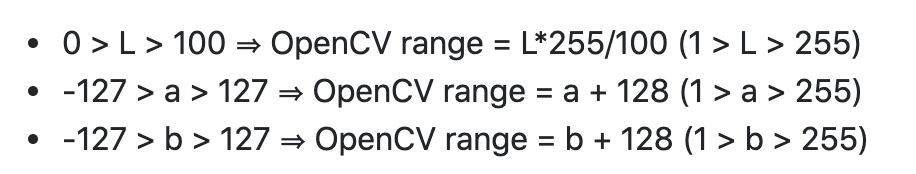

In [6]:
def mask_img(img, mfc, T_bg=5, T_gray=5):
    
#     mask = np.ones((img.shape[0], img.shape[1]), dtype='uint8')

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
        # mask for background
            if np.max(abs(img[i,j,:]-mfc)) <= T_bg:
                img[i,j] = [255,128,128]
            # mask for gray
            elif np.max(abs(img[i,j,1:]-np.array([128, 128]))) <= T_gray:
                img[i,j] = [255,128,128]
    
    return img

In [7]:
# mask_lab = generate_mask(img_lab, mfc, T_bg=5, T_gray=5)

In [8]:
# masked_img_lab = cv2.bitwise_and(img_lab,img_lab,mask=mask_lab)

In [9]:
# def mask_img(img, mask):
#     for i in range(img.shape[0]):
#         for j in range(img.shape[1]):
#         # mask for background
#             if mask[i,j] == 0:
#                 img[i,j] == [0,128,128]
                
#             elif np.max(abs(img[i,j,1:]-np.array([128, 128]))) <= T_gray:
#                 mask[i,j] = 0
    
#     return img

masked_img_lab = mask_img(img_lab, mfc)

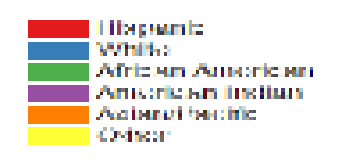

In [10]:
plt.imshow(cv2.cvtColor(masked_img_lab, cv2.COLOR_LAB2RGB))
plt.axis('off')
plt.show()

In [11]:
from sklearn.cluster import DBSCAN

In [12]:
def color_clustering(img, eps=5, min_samples=20):
    data = []
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            data.append(np.concatenate((img[i,j,:], np.array([i,j]))))
            
    clustering = DBSCAN(eps=eps, min_samples=min_samples).fit(np.array(data)) 
    
    color_dict = {}
    
    # find colors of pixels in each cluster
    for p in range(max(clustering.labels_)+1):
        color_dict[p] = img.reshape(-1,3)[clustering.labels_==p]
        
    # find most frequent color in each cluster
    list_color = []
    for q in color_dict.values():
        mfc_ = find_most_frequent_color(q)
        # remove masked colors
        if mfc_.tolist() != [255, 128, 128]:
            list_color.append(mfc_)
    
    return list_color

In [13]:
colors = color_clustering(masked_img_lab, eps=5, min_samples=10)

In [14]:
def plot_color(colors):
    color_matrices = []
    for i in colors:
        color_matrices.append(np.full((20, 20, 3), i.tolist(), dtype='uint8'))
        
    img = np.concatenate(color_matrices, axis=1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_LAB2RGB))
    plt.axis('off')
    plt.show()   

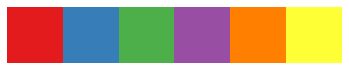

In [15]:
plot_color(colors)